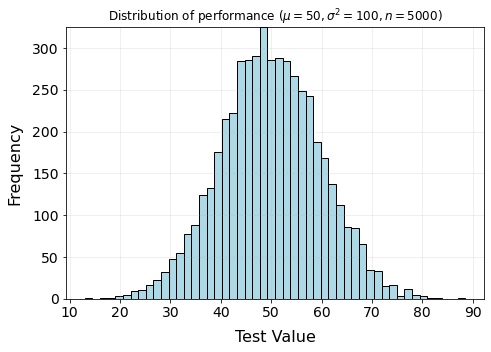

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np

# the number of obs.
n = 5000
 # the mean
mu = 50.0
# the variance and standard deviation
sigma_sq = 100
sigma = np.sqrt(sigma_sq)

# generate the data
data = np.random.normal(mu, sigma, n)

# creathe distribution plot
fig, ax = plt.subplots(figsize = (7.5, 5))
hx, hy, _ = plt.hist(data, bins = 50, 
                     color = "lightblue", 
                     edgecolor='k')
ax.set_title(r'Performance memory test ($\mu = %s, \sigma^2 = %s, n = %s$)' % (mu, sigma_sq, n), 
             size=16.0, pad=15.0)
ax.set_ylabel('Frequency', 
             fontsize=16.0, labelpad=10)
ax.set_xlabel('Test Value', 
             fontsize=16.0, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.ylim(0.0,max(hx) + 0.05)
plt.title(r'Distribution of performance ($\mu = 50, \sigma^2 = 100, n = %s$)' % n)
plt.grid(alpha = 0.25)

plt.savefig("./images/numpy_random_numbers_normal_distribution.png", bbox_inches = 'tight', dpi=600)
plt.show()

In [ ]:
import seaborn as sns
from scipy.stats import norm, gaussian_kde

data = np.random.normal(mu, sigma, 5000)

fig, ax = plt.subplots(figsize = (8, 5))
points = sns.kdeplot(data, lw=2).get_lines()[0].get_data()
x = points[0]
y = points[1]
ax.fill_between(x, y, where = x >= 69.5, color='r')
ax.axvline(69.5, color='r')
ax.text(x=69.5,
        y=0.025,
        s='69.5',
        fontdict=dict(fontsize=16),
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0))
ax.set_title('Probabilty distribution of memory performance values', 
             size=16.0, pad=15.0)
ax.set_ylabel('Density', 
             fontsize=16.0, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("./images/density_memory.png", bbox_inches='tight', dpi=600)
plt.show()

# Introduction to statistical thinking and empirical research methods
### Department of Psychology - Winter Term 2021/2022    


### Block 2: Hypothesis Testing, P-Values

[José C. García Alanis (he/him)](https://github.com/JoseAlanis)
<br>
Research Fellow - [Dep. of Psychology](https://www.uni-marburg.de/en/fb04/department) at [Uni Marburg](https://www.uni-marburg.de/en).
<br>
Affiliated - [Child and Adolescent Psychology](https://www.uni-marburg.de/en/fb04/workgroups/pediatric-and-adolescent-psychology), [RTG Breaking Expectations](https://www.uni-marburg.de/en/fb04/rtg-2271).
<br>

31/05/2021

<img align="left" src="https://raw.githubusercontent.com/G0RELLA/gorella_mwn/master/lecture/static/GitHub-Mark-120px-plus.png" alt="logo" title="Github" width="30" height="10" /> 

<img align="right" src="./images/pdf_x_95.png" alt="logo"  title="pdf_x" width="550" height="500" />


&nbsp;&nbsp;@JoseAlanis 

### Before we get started ...
<br>

- Rember that you can follow the lecture by dowloading the corresponding jupyter notebook (slides) from the online repository on [GitHub](https://github.com/JoseAlanis/p_values).
<br>
<br>
- For more (complementary) information you can check the literature for this lecture:
    - In German: 
       - **Chapter 8**, Gollwitzer, M., Eid, M., & Schmitt, M. (2013). Statistik und Forschungsmethoden. (library)
    - Additional materials in English: 
       - Russell A. Poldrack's GitBook: [Statistical Thinking for the 21st Century.](https://statsthinking21.github.io/statsthinking21-core-site/hypothesis-testing.html)


### Lecture goals ❗

- You know why **randomness plays a role in statistical decision making**. 
- You **understand** the concept of **hypothesis testing**.
- You are able explain what **"significance"** means.
- You have an idea of what **P-values** are (and, ideally, what they're not).
- You can relate this knowledge to **real world examples**.

### What we know so far ...

$$X \sim N(\mu, \sigma^2)$$

$$X - the\:variable$$
$$\mu - the\:mean$$
$$\sigma^2 - the\:variance$$

- The distribution of a variable *X*: 
   - Shows information about the possible values of *X*. 
      - Tells us which values are typical, which are rare, and which are (seamingly) impossible. 
      - Reveals the “best guess” for predicting future values, as well as how certain (or uncertain) that guess may be. 
      - Show the “boundary” conditions on a variable’s values.   


### Working example

> **P. 191**  Gollwitzer, M., Eid, M., & Schmitt, M. (2013).    

- Testing a difference of means.
<br>
<br>
- A psychologist runs an experiment to test the effects of a promising memory training on individuals memory performance.
   - Assessment of memory performance in the general population.
      - mean = 50, variance = 100.

$$X \sim N(50, 100)$$

<center><img src="./images/numpy_random_numbers_normal_distribution.png" width="550" height="500"/></center>

### Working example

> **P. 191**  Gollwitzer, M., Eid, M., & Schmitt, M. (2013).   

- Next, the psychologist selects a group of subjects, trains them with the promising training, and re-tests their memory performance.
- Result:

$$\bar{x} = 58, \mu = 50$$

$$\bar{x} \neq \mu $$

- Conclusion:
   - 58 > 50
   - But, does that mean that the training is effective? 
   - Does the training (systematically) increase memory performance.

   - 🤓 not necessarily ...
   - ... why?

### Working example

> **P. 191**  Gollwitzer, M., Eid, M., & Schmitt, M. (2013).   

- Let's simulate the experiment

In [13]:
import numpy as np

# the number of obs. (5000 people)
n = 5000
 # the mean
mu = 50.0
# the variance and standard deviation
sigma_sq = 100
sigma = np.sqrt(sigma_sq)

# generate the data
data = np.random.normal(mu, sigma, n)

In [14]:
# lets get the sample characteristics

# max or min
data.max()

85.76871357638996

In [15]:
# the mean
data.mean()

50.10144883549437

In [16]:
# the standard dev.
data.std()

10.055883474027434

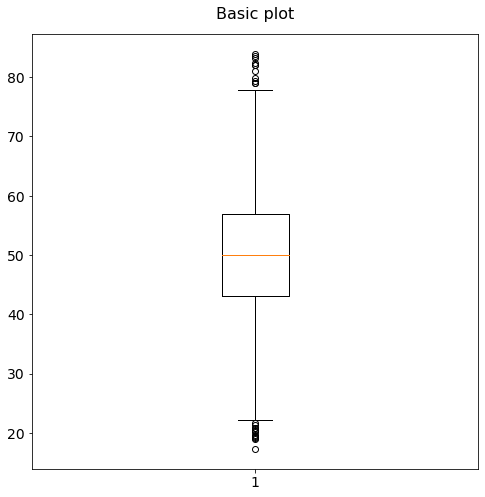

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Basic plot', size=16.0, pad=15.0)
ax.tick_params(axis='both', which='major', labelsize=14)

_ = ax.boxplot(data)

In [5]:
# run the experiments
for i in np.arange(10):
    
    # gather observations (5, 10, etc.)
    observations = np.random.choice(data, size=(i+1)*5, replace=False)
    
    
    # compute the mean
    x_bar = observations.mean()
    # round down to 2 decimals
    x_bar = np.round(x_bar, 2)
    
    # return values
    print('Exp. %s  (n=%s)  mean = %s' % (str(i+1).rjust(2), str((i+1)*5).rjust(2), x_bar))

Exp.  1  (n= 5)  mean = 50.49
Exp.  2  (n=10)  mean = 46.33
Exp.  3  (n=15)  mean = 50.78
Exp.  4  (n=20)  mean = 49.17
Exp.  5  (n=25)  mean = 50.11
Exp.  6  (n=30)  mean = 49.73
Exp.  7  (n=35)  mean = 50.17
Exp.  8  (n=40)  mean = 48.28
Exp.  9  (n=45)  mean = 51.19
Exp. 10  (n=50)  mean = 50.54


### Example

> **P. 191**  Gollwitzer, M., Eid, M., & Schmitt, M. (2013).   

- Result:

$$\bar{x} = 58, \mu = 50$$

$$\bar{x} \neq \mu $$

- Conclusion:
   - Does the training (systematically) increase memory performance.
   - 🤓 not necessarily, memory performace is subject to individual variation, i.e., sample means are (more or less) uncertain estimates.

- The question is:
    - Are the sample statistics are **a product of mere randomness**
    - Or is the training responsible for deviations from what we believe is true in the population.

### Hypothesis testing

- In the example:
   - There is no (real) population of succesfully trained subjects.
   - However, we can think about how that population might look like, **hypothetically speaking**.

- Postulate that:

$$untrained, \mu_{\:utrP} = 50$$

$$trained, \mu_{\:trP} > 50$$

- ❗ Hypothesis testing helps us decide how likely it is that the observed data (i.e., mean = 58) was sampled from  a population of untrained subjects.
   - How big is the risk of making an error and misclassifing the data.

### Hypothesis testing

- The **Null Hypothesis** as a reference frame:
    - How would the data look like if there was in fact **no effect** of training?
        - i.e., imagine a world in which the training has no effect on memory performance. How would the performance of the trainded population be (on average).

- e.g.,   
    - There is no difference between untrained and trained:
$$\mu_{\:utrP} = \mu_{\:trP}$$
    - In short:
$$H_{0}: \mu = \mu_{\:0}$$

- Null referes to the assumption that, under H0, there is no difference between the means (Null = no effect = zero = "nada")
- Hypothesis emphasizes that this is an assumtion, and that, in principle, it can be wrong.

### Hypothesis testing

- The **Null Hypothesis** as a reference frame:
<br>

$$H_{0}: \mu = \mu_{\:0}$$

- The **Alternative Hypothesis**, our research hypothesis:
    - The training has an effect, i.e., people are better after training.
<br>

$$H_{a}: \mu > \mu_{\:0}$$
<br>

### Hypothesis testing

- 🤔 (back to our example)
- Experiment to test the effects of a memory training on individuals memory performance.

- Possible outcomes after training:
    - Mean = 58 
    - Mean = 62
    - Mean = 69.5

- How do I know if my data is higher, or **high enough**, to reject the Null Hypothesis (i.e., the hypothesis that there is actually no effect at all).
- Where do I draw the line?


- Remember: We can compute the probability for sample values within a certain range.
    - E.g., the sample median shows me: 50% of the data are below this value.

### Throw back to block one (sample statistics)

### Levels of confidence


- We can define *levels of confidence*:
    - E.g., a 95% confidence interval of sample mean:
       - "I am 95% sure, that the true mean lies within this range of values"
           - IQ = 101.53, CI = [96.656, 106.422]
           - "... values above 106.42 and below 96.65 would surprise me."

- Similarly, we can define **significance levels**:
    - Usually, the complement of a confidence level *C*, thus
    
$$1 - 0.95 = 0.05$$

- I.e., for a confidence level of 95%, the corresponding significance level would be 5%, and is usually denoted by the greek letter *alpha*

$$\alpha = 1 - c$$

- Some commonly used significance levels are 0.05 and 0.01 (i.e., 5% or 1%)

- For the IQ example, IQ = 101.53, 95% CI = [96.656, 106.422], would mean:
    - "I am 95% sure, that the true mean lies within this range of values [96.656, 106.422] ... "
    - "... values above 106.42 and below 96.65 would surprise me."

### The P-Value

- Using Alpha, we can tell whether the a **value after training** is surprisingly higher than the **hypothetical** mean of untrained subjects.

- Suppose the simplest of all cases:
    - We train one person with the promissing memory training and test his/her performance afterwards.

- We decide, if the resulting value is amongst the highest 5% of the H0 values, then we can be pretty sure that that value does not belong to an untrained person.
   - I.e., it is significantly different from the mean of an untrained population.

### The P-Value

- We obtain a value of 69.5 in memory performance.
- The image below shows this value, along with the range of values that are higher than that value.
- The Y-axis shows the probabily for this event under H0, **the P-value**.

$$P(E|H_{0})$$

<br>
<center><img src="./images/density_memory.png" width="550" height="500"/></center>

- I.e., **P-value** is the probability of obtaining a value of 69.5 in a world where the training had no effect (e.g., a sample with a mean equal to that of untrained subjects).

### The P-Value

<center><img src="./images/density_memory.png" width="550" height="500"/></center>


- To find this probability we can transform the test value to a *z-score* using the rule we learned last lecture.

$$z = \frac{ \text{X} - \mu} {\sigma}$$

$$z = \frac{ \text{69.5} - 50} {10}$$

$$z = \frac{ \text{69.5} - 50} {10}$$

$$z = 1.95$$

### The P-value

- Now we can check what the probability of a value, which is higher than our test value would be in a normally distributed sample.
- We can check a [Z-table](http://pages.stat.wisc.edu/~ifischer/Statistical_Tables/Z-distribution.pdf).
- Or use python to find the **P-value**:

In [18]:
import scipy.stats

# compute p-value from z-score
p_value = scipy.stats.norm.sf(abs(1.95))

print('The p-value is %s' % np.round(p_value, 3))

The p-value is 0.026


### Hypothesis testing and the P-Value (summary)

- ❗ **Hypothesis tests** help us decide whether observed data is significantly different from what is believed to be true (under H0).
    - In the example, the **Null-Hypothesis** that there is in fact no effect of trainig (here subjects would have the same mean after and before memory training).

### Hypothesis testing and the P-Value (summary)

- ❗ We can define different **levels of significance**, at which we are sure enough that our data is different.
    - E.g., whether memory performance values are **surprisingly** far away from H0.
        - In less than 5% of all cases = Alpha of 5%.

### Hypothesis testing and the P-Value (summary)

- ❗ We can compute the probability for an observation to be more extreme than a certain value based on H0, i.e., the **P-value**.
- Usually, if the P-value is smaller than the defined significance level, we reject H0.
    - ❗ But careful, the **P-value** does not tell me how probable H0 actually is. It just tells me, how probable a value just as mine would be, in a world were there is actually no effect.
   - In fact, there is a chance that our data is actually from H0. For alpha = 0.05, then probability is 5%.

### Questions?